In [1]:
%%time
import malaya

CPU times: user 6.33 s, sys: 1.54 s, total: 7.88 s
Wall time: 12.4 s


In [2]:
positive_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan sebanyak RM50 juta. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
negative_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

All models have `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is False.**

All models have `add_neutral` parameters.
If True, it will add `neutral` probability, Else, default probabilities. **Default is True.**

## Load multinomial model

In [16]:
model = malaya.sentiment.multinomial()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.1708339408275661, 'positive': 0.008291660591724323, 'neutral': 0.8208743985807097}
{'negative': 0.5124503873063959, 'positive': 0.00487549612693598, 'neutral': 0.48267411656666814}


[{'negative': 0.5124503873063959,
  'positive': 0.00487549612693598,
  'neutral': 0.48267411656666814},
 {'negative': 0.5124503873063959,
  'positive': 0.00487549612693598,
  'neutral': 0.48267411656666814}]

Disable `neutral` probability,

In [4]:
print(model.predict(negative_text,get_proba=True,add_neutral=True))
print(model.predict(negative_text,get_proba=True,add_neutral=False))

{'negative': 0.5124503873063959, 'positive': 0.00487549612693598, 'neutral': 0.48267411656666814}
{'negative': 0.756225193653198, 'positive': 0.243774806346799}


## List available Transformer models

In [5]:
malaya.sentiment.available_transformer_model()

{'bert': ['base', 'small'], 'xlnet': ['base'], 'albert': ['base']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#sentiment-analysis

**You might want to use ALBERT, a very small size, 43MB, but the accuracy is still on the top notch.**

## Load ALBERT model

In [6]:
model = malaya.sentiment.transformer(model = 'albert', size = 'base')

W1018 00:21:45.580282 4405478848 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:68: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W1018 00:21:45.582058 4405478848 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:69: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W1018 00:21:48.671772 4405478848 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:64: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



#### Predict single string

In [7]:
model.predict(positive_text,get_proba=True)

{'negative': 0.928911, 'positive': 0.0007108902, 'neutral': 0.070378125}

#### Predict batch of strings

In [8]:
model.predict_batch([positive_text, negative_text],get_proba=True)

[{'negative': 0.928911, 'positive': 0.00071089127, 'neutral': 0.070378125},
 {'negative': 0.94854975, 'positive': 0.0005145021, 'neutral': 0.050935745}]

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [10]:
model.predict_words(negative_text)

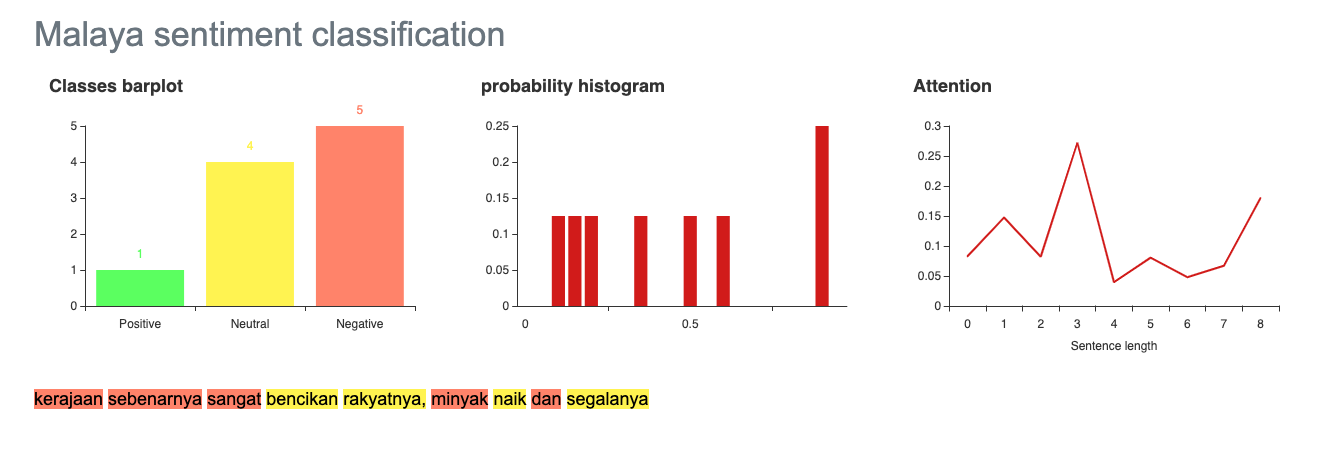

In [11]:
from IPython.core.display import Image, display

display(Image('bert-sentiment.png', width=800))

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [12]:
multinomial = malaya.sentiment.multinomial()
bert = malaya.sentiment.transformer(model = 'bert', size = 'base')

In [14]:
bert.predict(positive_text, get_proba = True)

{'negative': 4.0951385e-05, 'positive': 0.9959047, 'neutral': 0.0040543675}

In [15]:
malaya.stack.predict_stack([multinomial, bert, model], [positive_text, negative_text])

[{'negative': 0.018319895741887974,
  'positive': 0.01804067965859282,
  'neutral': 0.060514741560741055},
 {'negative': 0.7832971121695218,
  'positive': 0.0006567555331073403,
  'neutral': 0.06501884954119536}]